# COMP5310 PROJECT STAGE 2
### Assignment Group 30
### SID1: 540908237 - mift0353, SID2: 540844821 - mrau0998 , SID3: 550206406 - vsup0468

## Group Component 1

### Preliminary Changes to Data
This section imports all required libraries for preprocessing, modeling, evaluation, and visualization.

In [5]:
# Import all dependencies

import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
import keras_tuner as kt
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

#### Data Loading and Preprocessing
This section contains the code for loading and preprocessing the data.

In [7]:
# Import data

data = pd.read_csv("Group30_ FinalCleanData.csv")
data.head()

,Make_Model,Price,Mileage,Fuel,Age,Previous_Owners,Horsepower,Gearing_Type,Displacement,Drive_Chain
0,Audi A1,15770.0,56012.8,Benzine,3.0,1.0,66.0,Automatic,1422.0,front
1,Audi A1,14640.0,83449.8,Diesel,3.0,1.0,85.0,Automatic,1461.0,front
2,Audi A1,16422.0,62110.8,Diesel,3.0,1.0,85.0,Automatic,1598.0,front
3,Audi A1,17990.0,26414.9,Benzine,3.0,1.0,85.0,Automatic,1461.0,front
4,Audi A1,18900.0,9752.0,Diesel,1.0,1.0,85.0,Automatic,1598.0,front


In [8]:
# Separate the features and target variable.

features_df = data.drop("Price", axis=1)
target_df = data["Price"]

In [9]:
# View the first 5 rows of features_df

features_df.head()

,Make_Model,Mileage,Fuel,Age,Previous_Owners,Horsepower,Gearing_Type,Displacement,Drive_Chain
0,Audi A1,56012.8,Benzine,3.0,1.0,66.0,Automatic,1422.0,front
1,Audi A1,83449.8,Diesel,3.0,1.0,85.0,Automatic,1461.0,front
2,Audi A1,62110.8,Diesel,3.0,1.0,85.0,Automatic,1598.0,front
3,Audi A1,26414.9,Benzine,3.0,1.0,85.0,Automatic,1461.0,front
4,Audi A1,9752.0,Diesel,1.0,1.0,85.0,Automatic,1598.0,front


In [10]:
# View the first 5 rows of target_df

target_df.head()

0    15770.0
1    14640.0
2    16422.0
3    17990.0
4    18900.0
Name: Price, dtype: float64

#### Data Split For train/validation/test sets

In [12]:
# Split full dataset to train, val, and test sets

# First split: train (80%) and temp (20%)
X_train_raw, X_temp_raw, y_train, y_temp = train_test_split(
    features_df, target_df, test_size=0.2, random_state=5310
)

# Second split: validation (10%) and test (10%) from temp
X_val_raw, X_test_raw, y_val, y_test = train_test_split(
    X_temp_raw, y_temp, test_size=0.5, random_state=5310
)

# validate the train, val and test sets shape
print(f"Shape of X_train_raw = {X_train_raw.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of X_val_raw = {X_val_raw.shape}")
print(f"Shape of y_val = {y_val.shape}")
print(f"Shape of X_test_raw = {X_test_raw.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train_raw = (2783, 9)
Shape of y_train = (2783,)
Shape of X_val_raw = (348, 9)
Shape of y_val = (348,)
Shape of X_test_raw = (348, 9)
Shape of y_test = (348,)


## End of Group Component 1

## Individual Component
This section contains the code for creating, optimizing, and evaluating the models.

### 1. Multilayer Perceptron (MLP) - Unikey: mift0353

Pseudocode:

#### Data Pre-processing

In [18]:
# Data preprocessing

## Define categorical and numerical features
categorical_features = features_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = features_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

## Preprocess categorical columns with one-hot encoding and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

X_train = preprocessor.fit_transform(X_train_raw)
X_val = preprocessor.transform(X_val_raw)
X_test = preprocessor.transform(X_test_raw)

## Convert dataframe to numpy array
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

#### Initial Model Development And Evaluation

In [20]:
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [21]:
# Set seet for reproducibility
set_seed(5318)

# Define MLP Model
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile MLP model
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train MLP model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = mlp_model.fit(X_train, y_train, 
                        validation_data=(X_val, y_val), 
                        epochs=50, 
                        batch_size=32, 
                        callbacks=[early_stop])

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 627178368.0000 - mae: 17707.4082 - val_loss: 331423328.0000 - val_mae: 16960.5156
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 624842112.0000 - mae: 17640.5938 - val_loss: 322000288.0000 - val_mae: 16693.1504
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 610880896.0000 - mae: 17249.1914 - val_loss: 292212288.0000 - val_mae: 15832.2559
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 574078720.0000 - mae: 16192.3545 - val_loss: 237266000.0000 - val_mae: 14119.2803
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 512237088.0000 - mae: 14258.5859 - val_loss: 165093888.0000 - val_mae: 11501.1396
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 436205792.0000 - mae: 11464.9805 - val_loss: 95464072.0000 - val_mae: 8262.4062
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 366820224.0000 - mae: 8211.6982 - val_loss: 48134224.0000 - val_mae: 5257.2241
Epoch 8/50
87

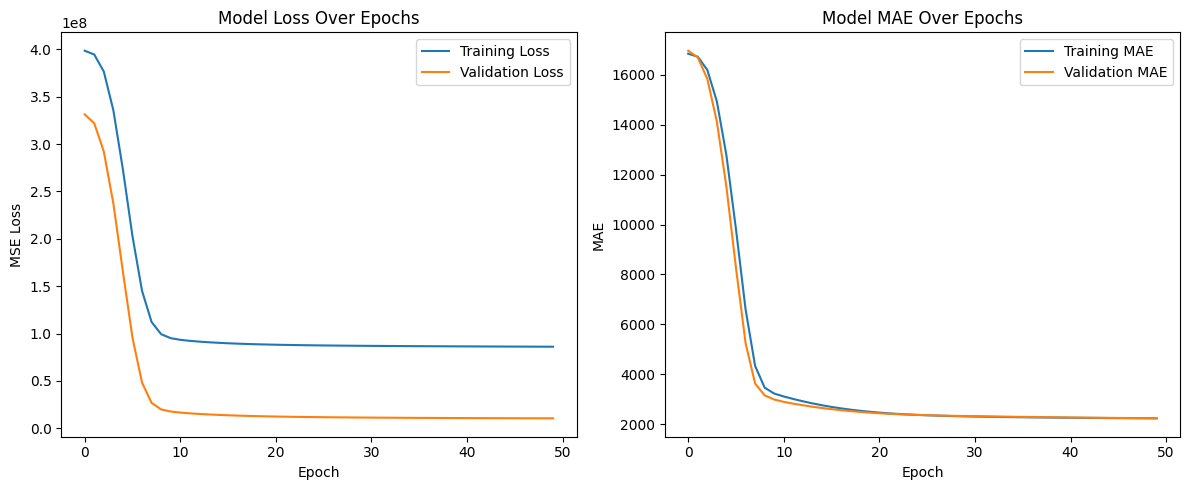

In [22]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model MAE Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


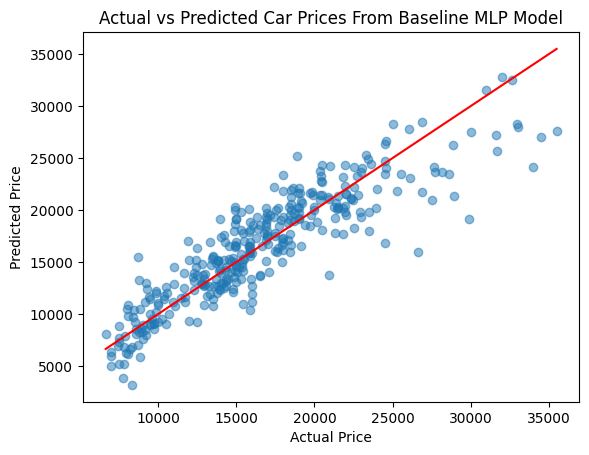

In [23]:
# Plot predictions vs actual

y_pred = mlp_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices From Baseline MLP Model")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.show()

In [24]:
# Evaluate initial model

# Compute MSE and MAE
loss, mae = mlp_model.evaluate(X_test, y_test)
print(f"Baseline MSE: {loss:.4f}")
print(f"Baseline MAE: {mae:.4f}")

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f"Baseline R-squared: {r2:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 6076520.0000 - mae: 1820.2839
Baseline MSE: 6800093.5000
Baseline MAE: 1946.3915
Baseline R-squared: 0.7966


#### Model Optimisation For MLP model

In [26]:
# Define function to do hyperparameter tuning

def build_mlp_model(hp):
    set_seed(5318)  # Set reproducible seed
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
    
    # Tune number of layers and units
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
        dropout = hp.Float(f'dropout_{i}', 0.0, 0.3, step=0.05)
        model.add(tf.keras.layers.Dropout(dropout))
    
    model.add(tf.keras.layers.Dense(1))  # output layer for regression
    
    # Compile with tuned learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-5, 1e-1, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )
    
    return model

In [27]:
# Initialize the tuner

tuner = kt.RandomSearch(
    build_mlp_model,
    objective='val_mae',
    max_trials=50,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='car_price_mlp'
)

In [28]:
# Search for the Best Hyperparameters

tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stop])

Trial 50 Complete [00h 00m 07s]
val_mae: 16952.798828125

Best val_mae So Far: 1860.0616455078125
Total elapsed time: 00h 04m 02s


In [29]:
# Show best 5 hyperparameter tuning results
mlp_trials = []
for trial in tuner.oracle.get_best_trials(num_trials=50):
    mlp_trials.append({
        'trial_id': trial.trial_id,
        'hyperparameters': trial.hyperparameters.values,
        'val_mae': trial.metrics.get_last_value('val_mae')
    })

mlp_results_df = pd.DataFrame(mlp_trials)
pd.set_option('display.max_colwidth', None)
mlp_results_df.head()

,trial_id,hyperparameters,val_mae
0,30,"{'num_layers': 5, 'units_0': 288, 'activation': 'relu', 'dropout_0': 0.25, 'learning_rate': 0.010067967933073138, 'units_1': 32, 'dropout_1': 0.0, 'units_2': 384, 'dropout_2': 0.0, 'units_3': 32, 'dropout_3': 0.0, 'units_4': 192, 'dropout_4': 0.2}",1860.061646
1,36,"{'num_layers': 2, 'units_0': 64, 'activation': 'relu', 'dropout_0': 0.0, 'learning_rate': 0.012087914217179986, 'units_1': 96, 'dropout_1': 0.1, 'units_2': 32, 'dropout_2': 0.2, 'units_3': 192, 'dropout_3': 0.0, 'units_4': 32, 'dropout_4': 0.05}",1875.381470
2,24,"{'num_layers': 4, 'units_0': 192, 'activation': 'relu', 'dropout_0': 0.0, 'learning_rate': 0.024304765893205023, 'units_1': 512, 'dropout_1': 0.15000000000000002, 'units_2': 128, 'dropout_2': 0.0, 'units_3': 224, 'dropout_3': 0.05, 'units_4': 64, 'dropout_4': 0.15000000000000002}",1878.245117
3,17,"{'num_layers': 2, 'units_0': 64, 'activation': 'tanh', 'dropout_0': 0.1, 'learning_rate': 0.05079537885159612, 'units_1': 512, 'dropout_1': 0.15000000000000002, 'units_2': 32, 'dropout_2': 0.05, 'units_3': 480, 'dropout_3': 0.2, 'units_4': 256, 'dropout_4': 0.25}",1880.592896
4,10,"{'num_layers': 2, 'units_0': 192, 'activation': 'relu', 'dropout_0': 0.05, 'learning_rate': 0.03874586791696551, 'units_1': 128, 'dropout_1': 0.25, 'units_2': 512, 'dropout_2': 0.0, 'units_3': 320, 'dropout_3': 0.2, 'units_4': 64, 'dropout_4': 0.25}",1882.787354


In [30]:
# Retrieve the Best Model

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param in best_hps.values:
    print(f" - {param}: {best_hps.get(param)}")

Best hyperparameters:
 - num_layers: 5
 - units_0: 288
 - activation: relu
 - dropout_0: 0.25
 - learning_rate: 0.010067967933073138
 - units_1: 32
 - dropout_1: 0.0
 - units_2: 384
 - dropout_2: 0.0
 - units_3: 32
 - dropout_3: 0.0
 - units_4: 192
 - dropout_4: 0.2


In [31]:
# Build and train final model

best_mlp_model = tuner.hypermodel.build(best_hps)
best_mlp_history = best_mlp_model.fit(X_train, y_train, 
                              validation_data=(X_val, y_val), 
                              epochs=30, 
                              batch_size=32, 
                              callbacks=[early_stop])

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 447433216.0000 - mae: 9898.4512 - val_loss: 10177332.0000 - val_mae: 2119.1997
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 305082720.0000 - mae: 5298.1753 - val_loss: 8360493.5000 - val_mae: 1888.0762
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 299982880.0000 - mae: 5159.7065 - val_loss: 8371863.5000 - val_mae: 1876.9768
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 297622496.0000 - mae: 5252.5337 - val_loss: 7942311.0000 - val_mae: 1860.0616
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 297407264.0000 - mae: 4934.4092 - val_loss: 8679729.0000 - val_mae: 1905.6592
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 298675456.0000 - mae: 5260.0869 - val_loss: 8498708.0000 - val_mae: 1891.0359
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 297716512.0000 - mae: 5376.0005 - val_loss: 8529418.0000 - val_mae: 1911.3151
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━

#### Model Results
The tuned model is evaluated on the test set, showing prediction performance through plots and evaluation metrics.

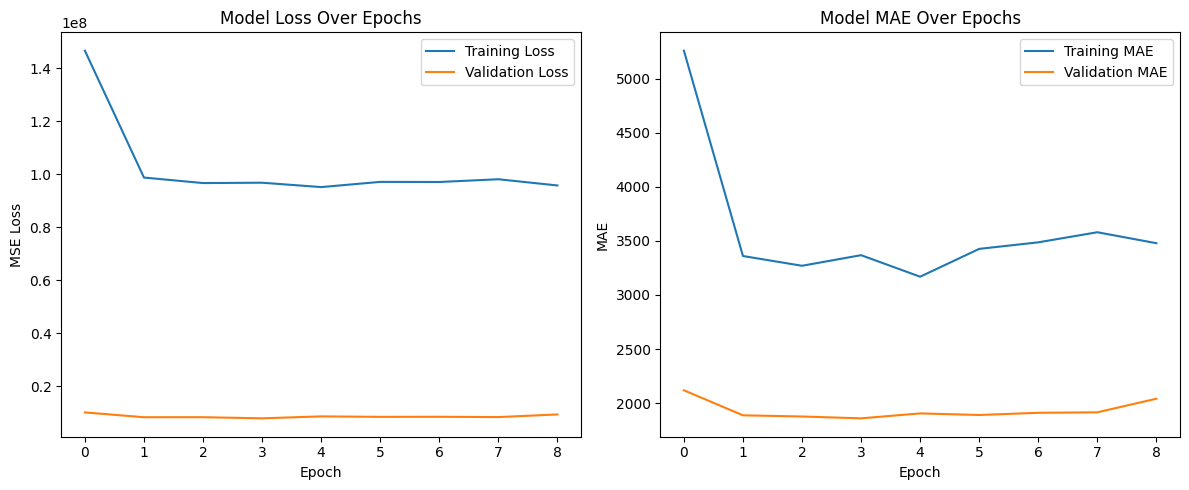

In [33]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(best_mlp_history.history['loss'], label='Training Loss')
plt.plot(best_mlp_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(best_mlp_history.history['mae'], label='Training MAE')
plt.plot(best_mlp_history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model MAE Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


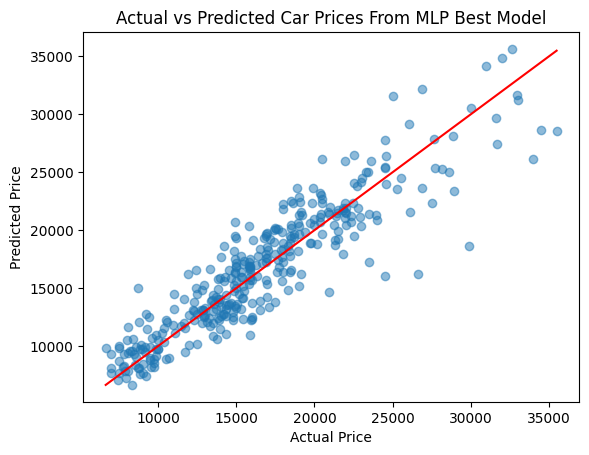

In [34]:
# Plot predictions vs actual

final_y_pred = best_mlp_model.predict(X_test)
plt.scatter(y_test, final_y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices From MLP Best Model")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.show()

In [35]:
# Evaluate the Best Model

# Compute MSE and MAE
loss, mae = best_mlp_model.evaluate(X_test, y_test)
print(f"BEST MSE: {loss:.4f}")
print(f"BEST MAE: {mae:.4f}")

# Calculate R²
r2 = r2_score(y_test, final_y_pred)
print(f"Best R-squared: {r2:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 5104543.5000 - mae: 1690.6796
BEST MSE: 5845211.5000
BEST MAE: 1801.7960
Best R-squared: 0.8251


In [36]:
# Use Trained Best MLP Model to Predict on New Data

new_data = pd.DataFrame([{
    'Make_Model': 'Audi A1',
    'Mileage': 54000.0,
    'Fuel': 'Benzine',
    'Age': 3.0,
    'Previous_Owners': 1.0,
    'Horsepower': 85.0,
    'Gearing_Type': 'Automatic',
    'Displacement': 1600.0,
    'Drive_Chain': 'front'
}])

# Preprocess the New Data Using the Same Fitted Preprocessor
new_data_processed = preprocessor.transform(new_data)

predicted_price = best_mlp_model.predict(new_data_processed)
print(f"Predicted price: ${predicted_price[0][0]:,.2f} ± approx. ${mae:,.0f} (based on test MAE)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted price: $16,647.41 ± approx. $1,802 (based on test MAE)


### 2. CatBoost (Categorical Boosting) - Unikey: mrau0998

Pseudocode:

#### Data Pre-processing

In [40]:
# Split raw data for CatBoost, no need for encoding
X_cb_train, X_cb_temp, y_cb_train, y_cb_temp = train_test_split(
    features_df, target_df, test_size=0.2, random_state=5310
)

X_cb_val, X_cb_test, y_cb_val, y_cb_test = train_test_split(
    X_cb_temp, y_cb_temp, test_size=0.5, random_state=5310
)

#### Initial Model Development and Evaluation

In [42]:
# Define categorical feature names (these are raw, unencoded)
categorical_features = ['Make_Model', 'Fuel', 'Gearing_Type', 'Drive_Chain']

# Initialize CatBoost regressor
catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    cat_features=categorical_features,
    loss_function='RMSE',
    early_stopping_rounds=50,
    verbose=100,
    random_seed=5310
)

# Train the model using raw data and native categorical support
catboost_model.fit(
    X_cb_train, y_cb_train,
    eval_set=(X_cb_val, y_cb_val),
    use_best_model=True
)

0:	learn: 10602.8688131	test: 6456.1137236	best: 6456.1137236 (0)	total: 59.6ms	remaining: 59.6s
100:	learn: 8061.6494633	test: 3494.5797666	best: 3494.3732925 (99)	total: 148ms	remaining: 1.32s
200:	learn: 7530.6426853	test: 3413.6532713	best: 3413.6117960 (198)	total: 232ms	remaining: 924ms
300:	learn: 6467.7670757	test: 3380.9605260	best: 3370.6510099 (271)	total: 329ms	remaining: 763ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 3370.65101
bestIteration = 271

Shrink model to first 272 iterations.


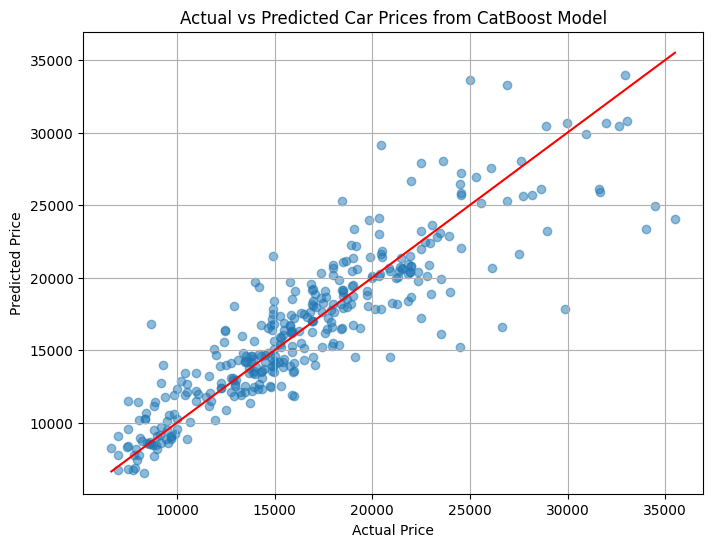

In [43]:
# Predict using CatBoost model
y_cb_pred = catboost_model.predict(X_cb_test)

# Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_cb_test, y_cb_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices from CatBoost Model")
plt.plot([min(y_cb_test), max(y_cb_test)], [min(y_cb_test), max(y_cb_test)], color='red')  # perfect prediction line
plt.grid(True)
plt.show()

In [44]:
# Predict on test set
y_cb_pred = catboost_model.predict(X_cb_test)

# Compute evaluation metrics
mse = mean_squared_error(y_cb_test, y_cb_pred)
mae = mean_absolute_error(y_cb_test, y_cb_pred)
r2 = r2_score(y_cb_test, y_cb_pred)

# Display results
print(f"CatBoost MSE: {mse:.4f}")
print(f"CatBoost MAE: {mae:.4f}")
print(f"CatBoost R²: {r2:.4f}")

CatBoost MSE: 6974258.8396
CatBoost MAE: 1808.0972
CatBoost R²: 0.7913


#### Model Optimisation

In [46]:
# Initiate the CatBoost model
cb_model = CatBoostRegressor(
    verbose=200, 
    cat_features=categorical_features,
    loss_function='RMSE',
    early_stopping_rounds=50,
    random_seed=5310
)

# Declare the parameters to be tested
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'iterations': [500, 1000, 1500]
}

# Define scoring for both MSE and MAE
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

# Perform grid search with multiple scorers
grid_search = GridSearchCV(
    cb_model,
    param_grid,
    cv=3,
    scoring=scoring,
    refit='neg_mse',  # Choose which to optimize for, 'neg_mse' or 'neg_mae'
    n_jobs=-1,
    verbose=3
)

# Fit the model
grid_search.fit(X_cb_train, y_cb_train)

print("Best params:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
0:	learn: 10703.1689579	total: 4.24ms	remaining: 6.36s
200:	learn: 8543.2479428	total: 295ms	remaining: 1.91s
400:	learn: 7988.3353699	total: 563ms	remaining: 1.54s
600:	learn: 7739.7286674	total: 800ms	remaining: 1.2s
800:	learn: 7399.4788905	total: 1.05s	remaining: 919ms
1000:	learn: 7058.1625798	total: 1.33s	remaining: 661ms
1200:	learn: 6737.9246735	total: 1.64s	remaining: 409ms
1400:	learn: 6297.4473703	total: 2.02s	remaining: 143ms
1499:	learn: 6117.5313786	total: 2.2s	remaining: 0us
Best params: {'depth': 8, 'iterations': 1500, 'learning_rate': 0.01}
Best score: 74237601.9428166


In [47]:
# Get full cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns
cb_results_df = cv_results[[
    'params',     
    'std_test_neg_mse',        
    'rank_test_neg_mse',
    'mean_fit_time',
    'mean_score_time',
    'mean_test_neg_mse',    
    'mean_test_neg_mae'     
]]

# Convert negative MSE and MAE to positive
cb_results_df['mean_test_mse'] = -cb_results_df['mean_test_neg_mse']
cb_results_df['mean_test_mae'] = -cb_results_df['mean_test_neg_mae']

# Sort by best MSE score
cb_results_df = cb_results_df.sort_values(by='mean_test_mse')

# Display the results without scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)

# Display top 5 results
pd.set_option('display.max_colwidth', None)
cb_results_df[['params', 'mean_test_mse', 'mean_test_mae', 'std_test_neg_mse', 'rank_test_neg_mse', 'mean_fit_time', 'mean_score_time']].head(5)


,params,mean_test_mse,mean_test_mae,std_test_neg_mse,rank_test_neg_mse,mean_fit_time,mean_score_time
16,"{'depth': 8, 'iterations': 1500, 'learning_rate': 0.01}",74237601.9428,2114.5356,22967407.0999,1,7.3496,0.0055
14,"{'depth': 8, 'iterations': 1000, 'learning_rate': 0.01}",74700636.7251,2121.9511,25857709.9528,2,4.7773,0.0055
10,"{'depth': 6, 'iterations': 1500, 'learning_rate': 0.01}",74837173.0875,2162.2511,25812062.0857,3,3.9400,0.0071
12,"{'depth': 8, 'iterations': 500, 'learning_rate': 0.01}",76649966.8654,2123.0313,29178906.7106,4,2.2296,0.0062
8,"{'depth': 6, 'iterations': 1000, 'learning_rate': 0.01}",77636497.7234,2158.4766,28937943.2404,5,2.3555,0.0076


In [48]:
# Get the best performing model
cb_model_best = grid_search.best_estimator_

# Train the model on the full training data
cb_model_best.fit(X_cb_train, y_cb_train, eval_set=(X_cb_val, y_cb_val), verbose=100)

0:	learn: 10703.1689579	test: 6586.1724818	best: 6586.1724818 (0)	total: 3.51ms	remaining: 5.26s
100:	learn: 9176.8105081	test: 4428.8875120	best: 4428.8875120 (100)	total: 179ms	remaining: 2.49s
200:	learn: 8543.2479428	test: 3768.7056641	best: 3768.7056641 (200)	total: 330ms	remaining: 2.13s
300:	learn: 8214.9794035	test: 3574.0125258	best: 3574.0125258 (300)	total: 469ms	remaining: 1.87s
400:	learn: 7988.3353699	test: 3487.6193597	best: 3487.6193597 (400)	total: 609ms	remaining: 1.67s
500:	learn: 7872.3835299	test: 3422.9564153	best: 3422.9564153 (500)	total: 736ms	remaining: 1.47s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 3408.275894
bestIteration = 544

Shrink model to first 545 iterations.


#### Model Results

###### The tuned model is evaluated on the test set, showing prediction performance through plots and evaluation metrics.

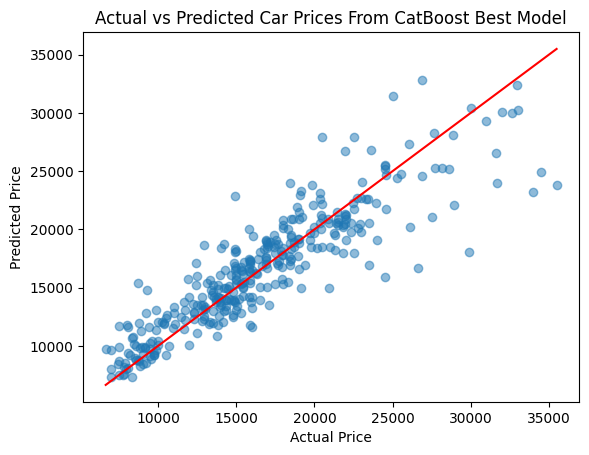

In [51]:
# Make predictions on the test set
y_cb_pred = cb_model_best.predict(X_cb_test)

# Plot predictions vs actual values
plt.scatter(y_cb_test, y_cb_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices From CatBoost Best Model")

# Plot a perfect line (diagonal line) representing ideal predictions
plt.plot([min(y_cb_test), max(y_cb_test)], [min(y_cb_test), max(y_cb_test)], color='red')  # perfect line
plt.show()

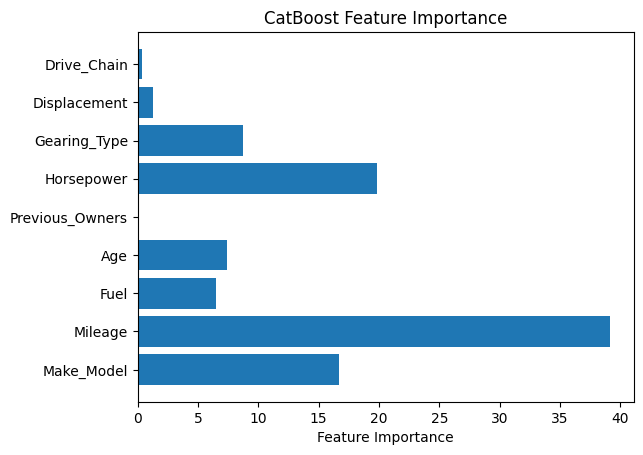

In [52]:
# Plot feature importance
feature_importance = catboost_model.get_feature_importance()
features = X_cb_train.columns  # Make sure your feature matrix is a DataFrame with column names
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()

In [53]:
mse = mean_squared_error(y_cb_test, y_cb_pred)
mae = mean_absolute_error(y_cb_test, y_cb_pred)
r2 = r2_score(y_cb_test, y_cb_pred)

print(f"CatBoost MSE: {mse:.4f}")
print(f"CatBoost MAE: {mae:.4f}")
print(f"CatBoost R²: {r2:.4f}")

CatBoost MSE: 6809784.8884
CatBoost MAE: 1796.7196
CatBoost R²: 0.7963


In [54]:
# New data (same structure as the original dataset)
new_data = pd.DataFrame([{
    'Make_Model': 'Audi A1',
    'Mileage': 54000.0,
    'Fuel': 'Benzine',
    'Age': 3.0,
    'Previous_Owners': 1.0,
    'Horsepower': 85.0,
    'Gearing_Type': 'Automatic',
    'Displacement': 1600.0,
    'Drive_Chain': 'front'
}])

# Make prediction using the best trained CatBoost model
predicted_price = cb_model_best.predict(new_data)

# Compute MAE from previous evaluation to provide the uncertainty
# You can also use the test MAE directly
print(f"Predicted price for new data: ${predicted_price[0]:,.2f} ± approx. ${mae:,.0f} (based on test MAE)")

Predicted price for new data: $17,544.97 ± approx. $1,797 (based on test MAE)


### 3. XGBoost (eXtreme Gradient Boosting) - Unikey: vsup0468

Pseudocode:

#### Data Pre-processing

In [58]:
# Separate features and target
X_xgb = pd.get_dummies(data.drop('Price', axis=1))
y_xgb = data['Price']

# Split data into train, validation, and test sets
X_xgb_train, X_xgb_temp, y_xgb_train, y_xgb_temp = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=5310)
X_xgb_val, X_xgb_test, y_xgb_val, y_xgb_test = train_test_split(X_xgb_temp, y_xgb_temp, test_size=0.5, random_state=5310)

#### Initial Model Development and Evaluation

In [60]:
# Initialize CatBoost regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    early_stopping_rounds=50,
    eval_metric='rmse',
    random_state=5310
)

# Fit the model using train and validation set for early stopping
xgb_model.fit(X_xgb_train, y_xgb_train, eval_set=[(X_xgb_val, y_xgb_val)], verbose=100)

# Print simple summary 
print("Model training completed successfully.")
print("Model parameters:")
print(xgb_model.get_params())

[0]	validation_0-rmse:6396.85750
[100]	validation_0-rmse:3057.75136
[168]	validation_0-rmse:3120.47225
Model training completed successfully.
Model parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': 50, 'enable_categorical': False, 'eval_metric': 'rmse', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 1000, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 5310, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subs

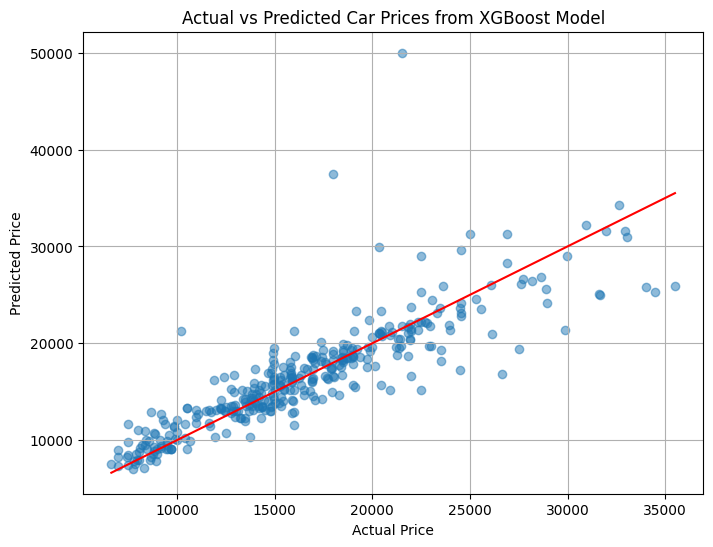

In [61]:
# Make predictions on the test set
y_xgb_pred = xgb_model.predict(X_xgb_test)

# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_xgb_test, y_xgb_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices from XGBoost Model")
plt.plot([y_xgb_test.min(), y_xgb_test.max()], [y_xgb_test.min(), y_xgb_test.max()], color='red')  # Perfect prediction line
plt.grid(True)
plt.show()

In [62]:
# Calculate evaluation metrics
mse = mean_squared_error(y_xgb_test, y_xgb_pred)
mae = mean_absolute_error(y_xgb_test, y_xgb_pred)
r2 = r2_score(y_xgb_test, y_xgb_pred)

# Display metrics
print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost R2: {r2:.4f}")

XGBoost MSE: 9215648.1954
XGBoost MAE: 1741.2384
XGBoost R2: 0.7243


#### Model Optimisation

In [64]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8]
}

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=5310),  # no early_stopping_rounds
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=3,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_xgb_train, y_xgb_train)

# Display best parameters and score
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Best score: -63698994.95860391


In [65]:
# Get the best model from GridSearchCV
xgb_model_best = grid_search.best_estimator_

# Fit the best model on the full training data
xgb_model_best.fit(X_xgb_train, y_xgb_train, eval_set=[(X_xgb_val, y_xgb_val)], verbose=200)

# Make predictions with the best model
y_xgb_pred_best = xgb_model_best.predict(X_xgb_test)

[0]	validation_0-rmse:6582.77749
[200]	validation_0-rmse:3485.76584
[400]	validation_0-rmse:3030.13150
[499]	validation_0-rmse:2959.05653


#### Model Results

###### The tuned model is evaluated on the test set, showing prediction performance through plots and evaluation metrics.

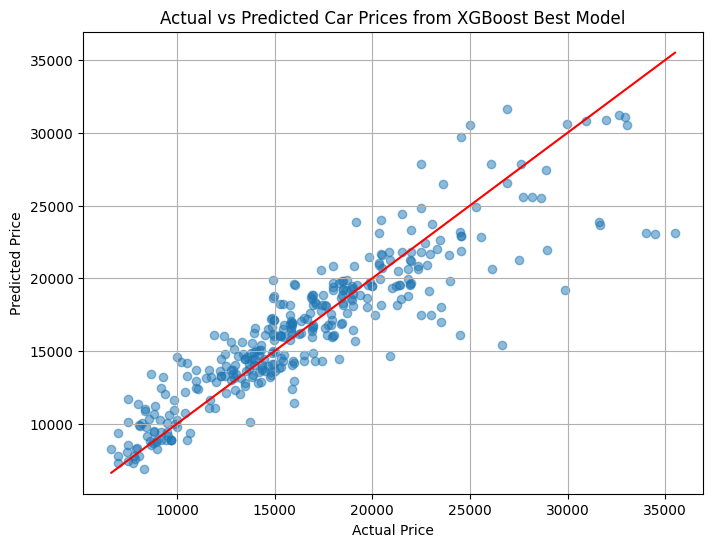

In [68]:
# Plot Actual vs Predicted using best model
plt.figure(figsize=(8,6))
plt.scatter(y_xgb_test, y_xgb_pred_best, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices from XGBoost Best Model")
plt.plot([y_xgb_test.min(), y_xgb_test.max()], [y_xgb_test.min(), y_xgb_test.max()], color='red')
plt.grid(True)
plt.show()


In [69]:
# Evaluate best model performance
mse_best = mean_squared_error(y_xgb_test, y_xgb_pred_best)
mae_best = mean_absolute_error(y_xgb_test, y_xgb_pred_best)
r2_best = r2_score(y_xgb_test, y_xgb_pred_best)

# Display final evaluation results
print(f"Test MSE: {mse_best:.4f}")
print(f"Test MAE: {mae_best:.4f}")
print(f"Test R2: {r2_best:.4f}")


Test MSE: 6411309.9259
Test MAE: 1732.0168
Test R2: 0.8082


In [70]:
# Prepare a new data sample (use the same structure as training data)
new_data = pd.DataFrame([{
    'Make_Model': 'Audi A1',
    'Mileage': 54000.0,
    'Fuel': 'Benzine',
    'Age': 3.0,
    'Previous_Owners': 1.0,
    'Horsepower': 85.0,
    'Gearing_Type': 'Automatic',
    'Displacement': 1600.0,
    'Drive_Chain': 'front'
}])

# Ensure new data matches the model's expected columns
new_data = pd.get_dummies(new_data).reindex(columns=X_xgb.columns, fill_value=0)

# Predict price for new data
predicted_price = xgb_model_best.predict(new_data)

# Display prediction with uncertainty based on test MAE
print(f"Predicted price for new data: ${predicted_price[0]:,.2f} ± approx. ${mae_best:,.0f} (based on test MAE)")


Predicted price for new data: $17,233.87 ± approx. $1,732 (based on test MAE)


## End of Individual Component

## Group Component 2

### Optimal Model Comparison

In [121]:
# Summarize the test performance of all optimized models

comparison_model = {
    'Model': ['MLP', 'CatBoost', 'XGBoost'],
    'Best Hyperparameters': [
        "{'num_layers': 5, 'units_0': 288, 'activation': 'relu', 'dropout_0': 0.25, 'learning_rate': 0.010067967933073138, 'units_1': 32, 'dropout_1': 0.0, 'units_2': 384, 'dropout_2': 0.0, 'units_3': 32, 'dropout_3': 0.0, 'units_4': 192, 'dropout_4': 0.2}",
        "{'depth': 8, 'iterations': 1500, 'learning_rate': 0.01}",
        "{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 1000}"
    ],
    'Test MSE': [5845211.5000, 6809784.89, 6411309.93],
    'Test MAE': [1801.7960, 1796.72, 1732.02],
    'Test R²': [0.8251, 0.796, 0.808]
}

df_comparison = pd.DataFrame(comparison_model)

df_comparison['Test MSE'] = df_comparison['Test MSE'].apply(lambda x: f"{x:,.2f}")
df_comparison['Test MAE'] = df_comparison['Test MAE'].apply(lambda x: f"{x:,.2f}")
df_comparison['Test R²'] = df_comparison['Test R²'].apply(lambda x: f"{x:.3f}")

# Display DataFrame as clean table
display(df_comparison.style.hide(axis='index'))

Model,Best Hyperparameters,Test MSE,Test MAE,Test R²
MLP,"{'num_layers': 5, 'units_0': 288, 'activation': 'relu', 'dropout_0': 0.25, 'learning_rate': 0.010067967933073138, 'units_1': 32, 'dropout_1': 0.0, 'units_2': 384, 'dropout_2': 0.0, 'units_3': 32, 'dropout_3': 0.0, 'units_4': 192, 'dropout_4': 0.2}","5,845,211.50","1,801.80",0.825
CatBoost,"{'depth': 8, 'iterations': 1500, 'learning_rate': 0.01}","6,809,784.89","1,796.72",0.796
XGBoost,"{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 1000}","6,411,309.93","1,732.02",0.808


### Final Model Recommendation

Based on the comparison, the MLP model emerges as the most suitable final model. It achieved the highest R² score (0.825) and the lowest MSE (5,845,211.50), indicating strong predictive accuracy and a superior ability to capture variance in car prices. Although XGBoost recorded the lowest MAE (1,732.02), its slightly lower R² and higher MSE suggest it may be less consistent in generalizing to new data. CatBoost, on the other hand, offers notable strengths through its native support for categorical features, streamlining the pipeline and minimizing the risk of information loss from manual encoding. Even so, the MLP model provides the most balanced performance across key evaluation metrics. Therefore, it is the most appropriate choice for predicting car prices in this task.

It is important to note that MLP models involve an element of randomness — particularly in the initialization of network weights and the order of training data, which can lead to slightly different results across runs, even with the same architecture and hyperparameters. To improve reproducibility, fixing random seeds and using deterministic settings can help. Nevertheless, the MLP model, under these conditions, remains the most appropriate choice for predicting car prices in this task.

## End of Group Component 2